1. The problem is to check whether the new drug is effective or not. To do this, I use the statistical hypothesis testing - assuming that the new drug is not effective ($H{_0}$) and trying to reject the hypothesis using the two-sample t-test. If we reject the null hypothesis, we will conclude that the new drug is effective.

2.  The data can be modeled in terms of random variables. Firstly, let us assume that the disease duration in the control group is a random variable $X$ with some distribution $F(x)$, while the disease duration in the treatment group is a random variable $Y$ with some distribution $G(y)$. Likewise, let us assume that $X$ and $Y$ are independent and identically distributed (i.i.d) random variables and follow the T-distibution. So, the hypotheses can be formulated as follows:
- $H_0: F(x) = G(y)$ - implying that placebo has the same effect as the drug
- $H_1: F(x) > G(y)$ - implying that people who take the drug on average recover in smaller amount of days  
The alternative is one-sided as we want to test whether the drug helps to recover faster (namely, we're not interested in the case when on average patients recover slowly). $\therefore$ if the new drug is effective, the disease duration in the treatment group will be less than in the control group.

3. I use the t-test to test the null hypothesis. T-test is applicable as have a small sample size ($n = 10$), and the population $std$ is also unknown. I firstly calculate the results manually and then use the `scipy.stats.ttest_ind` function to validate the t-test. Hence, it becomes possible to estimate the sample mean difference and observe whether these difference is statistically significant. I decide to test the case on two significance levels: 
- $\alpha = 0.05$ - a conventional one
- $\alpha = 0.01$ - a more strict level since we deal with drug testing

Calculations are presented below.  

$\mathbb{E}[X] = \mu_X $ – the expected value of the disease duration in the control group  
$\mathbb{E}[Y] = \mu_Y $ – the expected value of the disease duration in the treatment group  

$\sigma_X$ – the standard deviation of the disease duration in the control group $\implies$ $\sigma_{\bar{X}} = \frac{\sigma_X}{\sqrt{n}}$ – the standard deviation of the sample mean of the disease duration in the control group  
$\sigma_Y$ – the standard deviation of the disease duration in the treatment group $\implies$ $\sigma_{\bar{Y}} = \frac{\sigma_Y}{\sqrt{n}}$ – the standard deviation of the sample mean of the disease duration in the treatment group  

$\bar{X} = 6.9$ – the sample mean of the disease duration in the control group  
$\bar{X} = 6$ – the sample mean of the disease duration in the treatment group  

$Var(X) = \frac {1} {n-1} \sum{^{10}} (x_i - \bar{X})^2 \approx 0.767$  
$Var(Y) = \frac {1} {n-1} \sum{^{10}} (y_i - \bar{Y})^2 \approx 1.111$

$\implies t(X,Y) = \frac{\bar{Y} - \bar{X}}{\sqrt{\frac{Var(Y)}{n} + \frac{Var(X)}{n}}} \approx -2.077$

Now, let us validate the results of T-value using Python. We are also interested in the corresponding p-value to assess the significance of our results. The results are presented below.

Significance level: 0.05 
t-value: -2.076923076923078
p-value: 0.026201003203565984
H0 is rejected - drug is effective

Significance level: 0.01 
t-value: -2.076923076923078
p-value: 0.026201003203565984
H0 is not rejected - drug is not effective


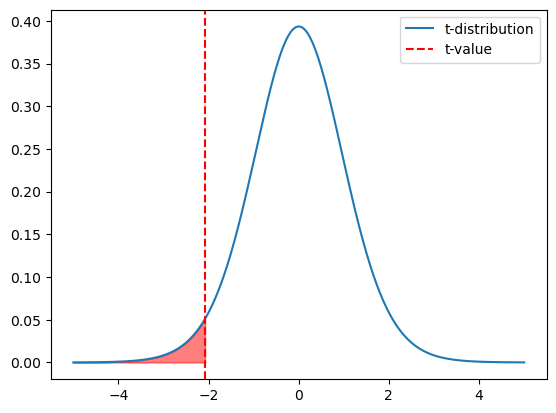

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

treatment = [7,6,6,5,5,6,7,5,5,8]
control = [6,7,7,5,7,8,8,7,7,7]
alpha = [0.05, 0.01]

for a in alpha:
    print(f'Significance level: {a} ')
    t, p = stats.ttest_ind(treatment, control, equal_var=True, alternative = 'less')
    print(f't-value: {t}\np-value: {p}')
    if p < a:
        print(f'H0 is rejected - drug is effective\n')
    else:
        print(f'H0 is not rejected - drug is not effective')

x = np.linspace(-5, 5, 1000)
y = stats.t.pdf(x, len(treatment)+len(control)-2, 0, 1)
plt.plot(x, y, label='t-distribution')
plt.axvline(t, color='r', linestyle='--', label='t-value')
plt.fill_between(x, 0, y, where=(x <= t), color='red', alpha=0.5)
plt.legend()
plt.show()

4. Would you invest into production of this drug?

Although on the conventional significance level of $\alpha = 0.05$ we reject the $H_0$, a more rigorous significance level of $\alpha = 0.01$ does not allow us to reject the null hypothesis. Hence, we cannot conclude that the new drug is effective. Basing our conclusion on one test with such a small sample size may drive us into the Type 1 error. However, the result of the t-test at the significance level of 1% may show that we just have insiffucient sample size to reject $H_0$ and we need to collect more data. If I were to make a decision now, I would _not_ invest into production of this drug. One stastistical test and one statistically significant result is definitely not enough to make a decision about a drug investment. I'd suggest to invest in more data collection and rigorous testing, because the drug may be effective, but we just don't have enough data to prove it on a stricter significance level.